<h1 style="text-align:center">Spotting Trends/Plots</h1>

In [1]:
%matplotlib inline

In [54]:
from mendeleev import get_table, get_engine, element, get_session, Element, IonicRadius, IonizationEnergy, OxidationState, Series
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
engine = get_engine()
ptable = pd.read_sql('elements', engine)
keys = ['atomic_number', 'atomic_radius', 'dipole_polarizability', 'electron_affinity', 'electronegativity', 'block']

In [4]:
session = get_session()

In [5]:
ies = session.query(Element.atomic_number, Series.name).join(Series).all()
df = pd.DataFrame(ies, columns=['atomic_number', 'series'])
ptable = pd.merge(ptable, df, how='outer', left_on='atomic_number', right_on='atomic_number')

In [6]:
pd.set_option('precision',3)
ptable[keys].describe()

,atomic_number,atomic_radius,dipole_polarizability,electron_affinity,electronegativity
count,118.00,88.00,106.00,86.00,93.00
mean,59.50,169.40,100.58,0.78,1.69
std,34.21,49.81,80.76,0.83,0.62
min,1.00,79.00,1.38,-0.07,0.70
25%,30.25,137.00,37.41,0.29,1.27
50%,59.50,160.00,67.75,0.50,1.61
75%,88.75,181.00,158.50,1.07,2.04
max,118.00,299.00,401.00,3.61,3.98


In [7]:
ptable[keys].cov()

,atomic_number,atomic_radius,dipole_polarizability,electron_affinity,electronegativity
atomic_number,1170.17,838.38,698.78,0.78,-6.46
atomic_radius,838.38,2481.05,2330.69,-4.34,-14.95
dipole_polarizability,698.78,2330.69,6522.92,-20.17,-40.14
electron_affinity,0.78,-4.34,-20.17,0.69,0.37
electronegativity,-6.46,-14.95,-40.14,0.37,0.38


In [8]:
ptable[keys].corr()

,atomic_number,atomic_radius,dipole_polarizability,electron_affinity,electronegativity
atomic_number,1.00,0.57,0.28,0.04,-0.35
atomic_radius,0.57,1.00,0.63,-0.23,-0.63
dipole_polarizability,0.28,0.63,1.00,-0.31,-0.81
electron_affinity,0.04,-0.23,-0.31,1.00,0.70
electronegativity,-0.35,-0.63,-0.81,0.70,1.00


In [10]:
sns.set(context='talk',style='whitegrid')

In [11]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (14, 10)})

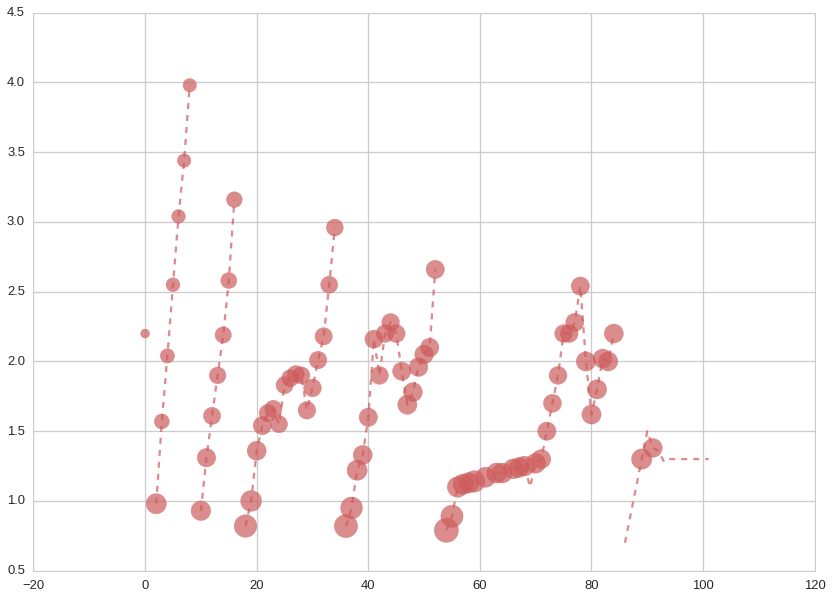

In [13]:
plt.plot(ptable.index, ptable['electronegativity'], '--', alpha=0.7, color="indianred")
plt.scatter(ptable.index, ptable['electronegativity'], s=ptable['covalent_radius']*2.5, alpha=0.7, color="indianred")

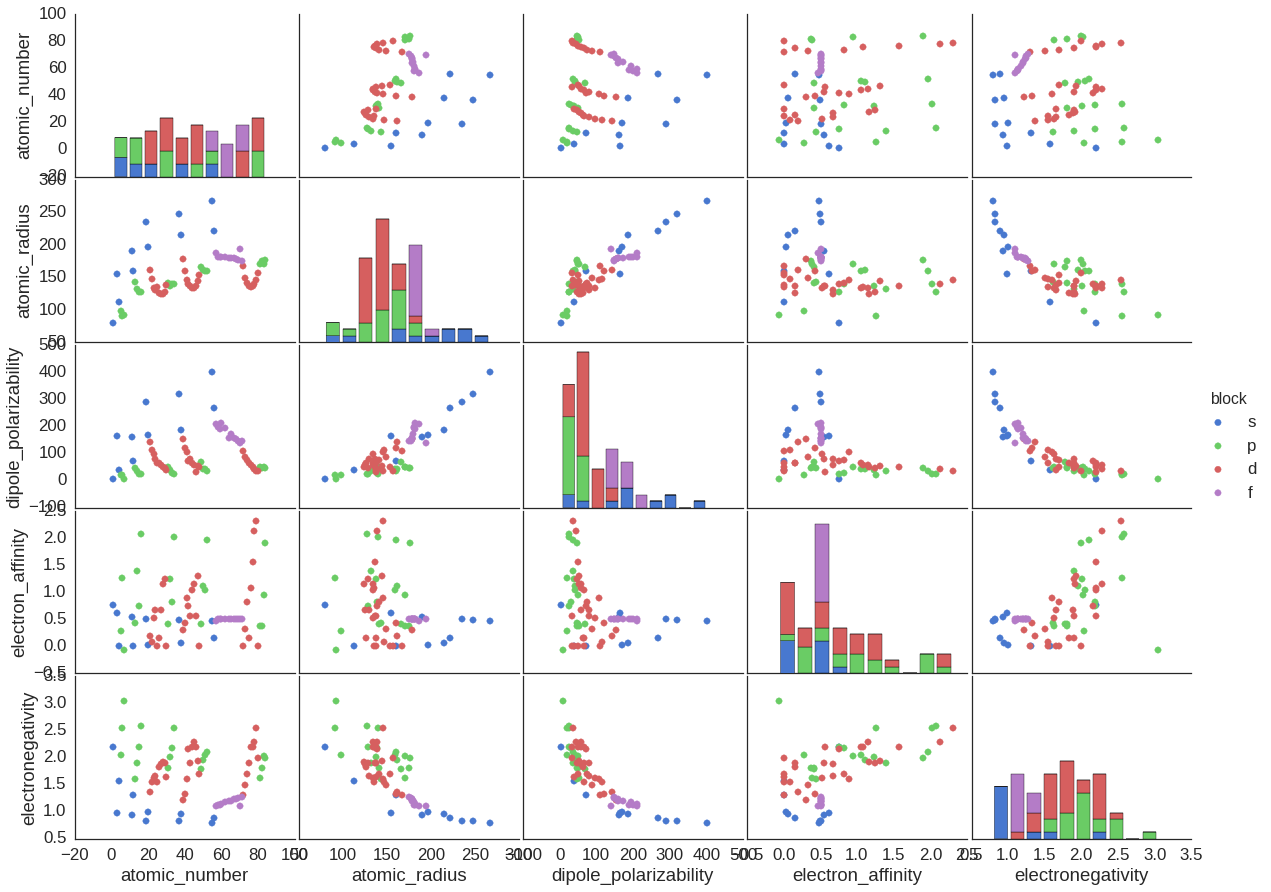

In [14]:
keys = ['atomic_number', 'atomic_radius', 'dipole_polarizability', 'electron_affinity', 'electronegativity', 'block']
sns.set(context='talk',style='white', palette='muted', font_scale=1.3,rc={"figure.figsize": (16, 12)})
plt.figure(figsize=(10, 10))
g = sns.PairGrid(ptable[keys].dropna(), hue='block', aspect=1.33, dropna=True)
g.fig.subplots_adjust(wspace=.02, hspace=.02)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, s=40)
g.add_legend()
plt.savefig('scattermatrix.png')

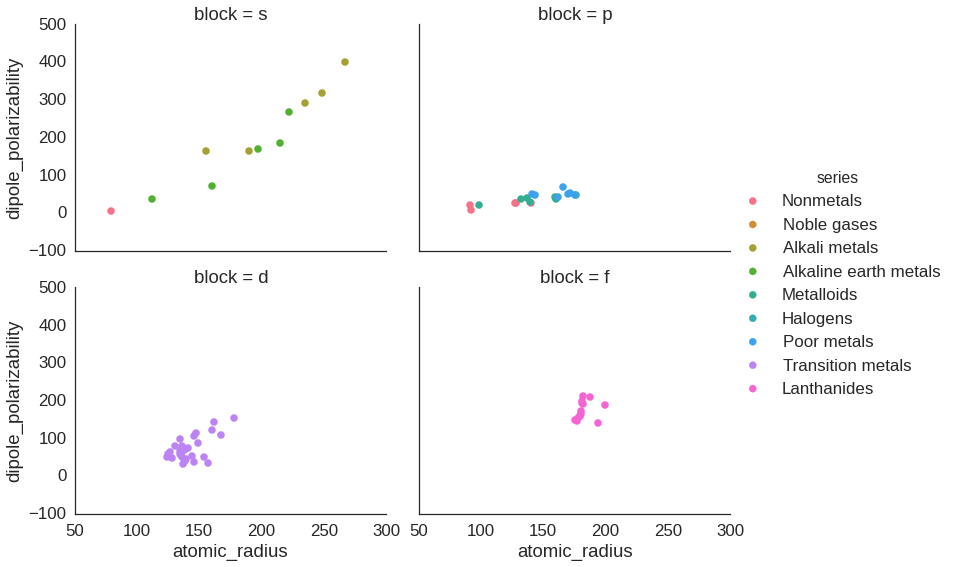

In [15]:
data = ptable[ptable['period'] < 7]
sns.set(context='talk',style='white', font_scale=1.3,rc={"figure.figsize": (16, 12)})
g = sns.FacetGrid(data, col='block', hue='series', col_wrap=2, aspect=1.33, size=4)
g.map(plt.scatter, 'atomic_radius', 'dipole_polarizability', s=50)
g.add_legend()
#g.savefig('polarizability.png')

## radii vs atomic number

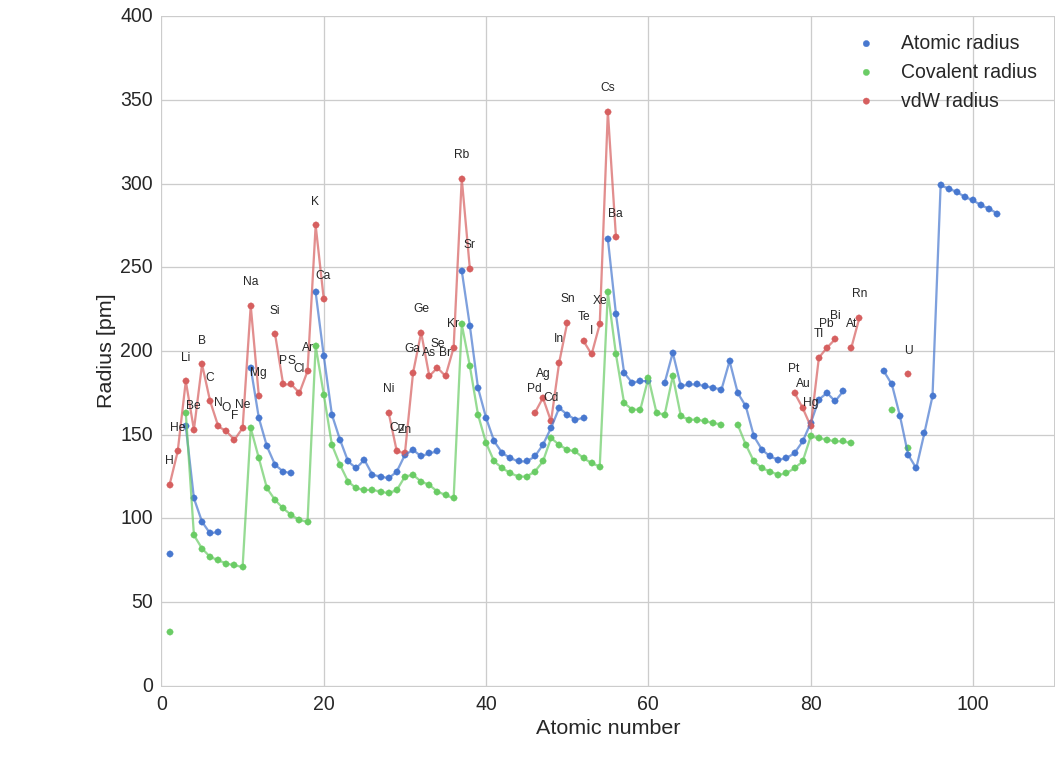

In [16]:
props = ['atomic_radius', 'covalent_radius', 'vdw_radius']
labels = ['Atomic radius', 'Covalent radius', 'vdW radius']
sns.set(context='talk',style='whitegrid', font_scale=1.5,rc={"figure.figsize": (16, 12)})
#plt.figure(figsize=(16, 12))
for p,l,c in zip(props, labels, sns.color_palette('muted')):
    plt.plot(ptable['atomic_number'], ptable[p], alpha=0.7, color=c)
    plt.scatter(ptable['atomic_number'], ptable[p], color=c, label=l, s=40)
for symbol, xy in zip(ptable['symbol'], zip(ptable['atomic_number'], ptable['vdw_radius'])):
    plt.annotate(symbol, xy=xy, textcoords="offset points", ha = 'center', va = 'top', xytext=(0, 30), size=12)
plt.xlim(0, 110)
plt.xlabel('Atomic number')
plt.ylabel('Radius [pm]')
plt.legend(loc='best', frameon=False)
#plt.savefig('radii.png')

## ionization energies

In [17]:
session = get_session()
new = ptable.copy()
for deg in [1, 2, 3, 4, 5]:
    ies = session.query(Element.atomic_number, IonizationEnergy.energy).join(IonizationEnergy).filter(IonizationEnergy.degree == deg).all()
    df = pd.DataFrame(ies, columns=['atomic_number', 'ie{}'.format(deg)])
    new = pd.merge(new, df, how='outer', left_on='atomic_number', right_on='atomic_number')

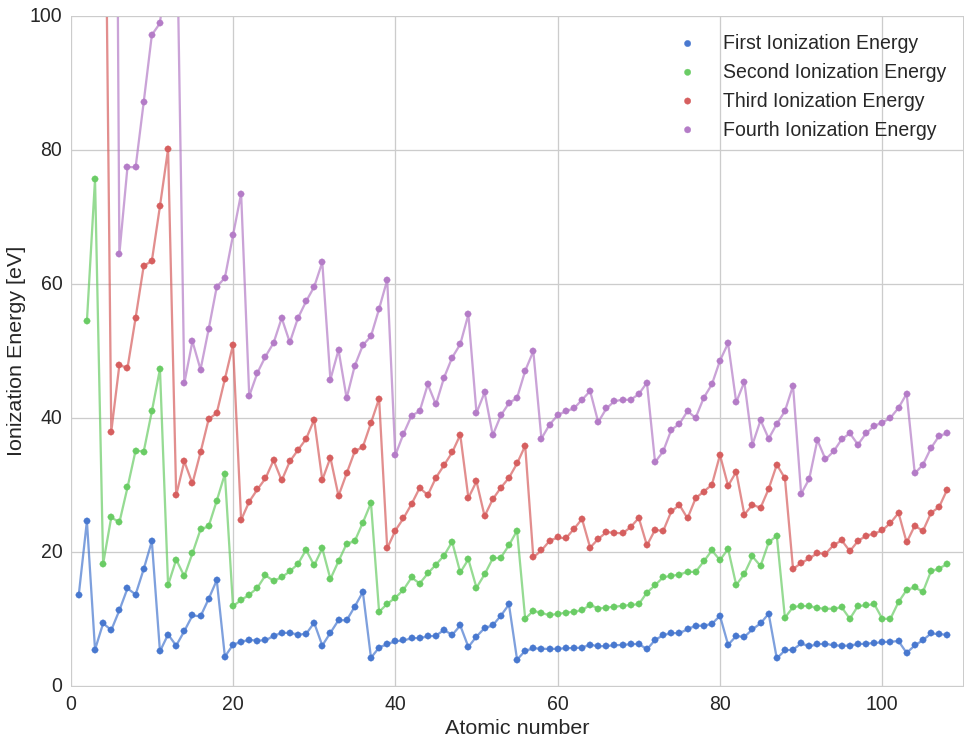

In [18]:
props = ['ie1', 'ie2', 'ie3', 'ie4']
labels = ['{} Ionization Energy'.format(x) for x in ['First', 'Second','Third', 'Fourth']]
sns.set(context='talk',style='whitegrid', font_scale=1.5,rc={"figure.figsize": (16, 12)})
#plt.figure(figsize=(16, 12))
for p,l,c in zip(props, labels, sns.color_palette('muted')):
    plt.plot(new['atomic_number'], new[p], alpha=0.7, color=c)
    plt.scatter(new['atomic_number'], new[p], color=c, label=l, s=40)
#for symbol, xy in zip(ptable['symbol'], zip(ptable['atomic_number'], ptable['vdw_radius'])):
#    plt.annotate(symbol, xy=xy, textcoords="offset points", ha = 'center', va = 'top', xytext=(0, 30), size=12)
plt.xlim(0, 110)
plt.ylim(0, 100)
plt.xlabel('Atomic number')
plt.ylabel('Ionization Energy [eV]')
plt.legend(loc='best', frameon=False)
#plt.savefig('ionization.png')

## boiling point heatmap

In [19]:
keys = ['period', 'group_id', 'boiling_point']
els = ptable[keys].dropna()
elements_rect = els.pivot(*keys)

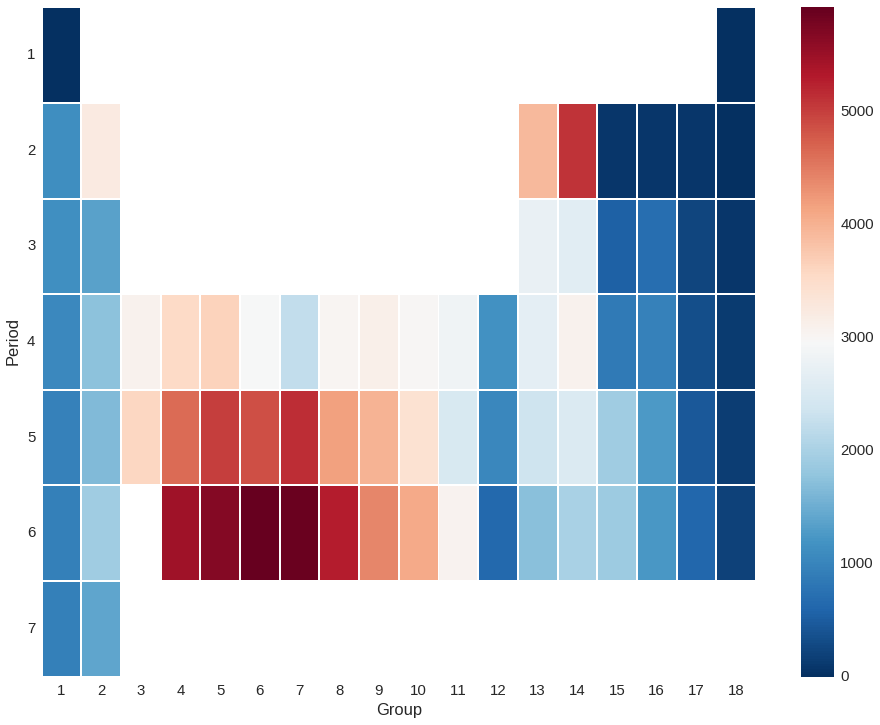

In [50]:
sns.set(font_scale=1.5, style='whitegrid', rc={"figure.figsize": (16, 12)})
mask = np.asarray(elements_rect.isnull())
ax = sns.heatmap(elements_rect, cmap='RdBu_r', mask=mask, linewidths=1)
n = len(ax.xaxis.get_ticklabels())
ax.set_yticklabels(elements_rect.index[::-1], rotation=0)
ax.set_xticklabels(range(1, n+1))
ax.set_xlabel('Group')
ax.set_ylabel('Period')


In [48]:
keys = ['period', 'group_id', 'boiling_point']
els = ptable[keys].dropna()
#idx = pd.MultiIndex.
elements_rect = els.pivot(index='period', columns='group_id', values='boiling_point')
elements_rect.index

Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64', name=u'period')

In [80]:
def heatmap(prop, style='whitegrid', figsize=(16, 10), cmap='RdBu_r', lw=1, output=None):
    '''
    Plot a heatmap of the given property
    
    Args:
      prop : str
        Name of the attribute of Element object that is available from the elements table
      style : str
        Seaborn style option, default='whitegrid
      figsize : tuple
        Size of the plot, default=(16, 10)
      cmap : str
        Colormap to use, default='RdBu_r'
      lw : int
        Seaborn heatmap linewidths argumentm default=1,
        see http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html
      output : str
        File name to save the plot, by default nothing is saved
    '''
    
    
    ptable = get_table('elements')

    keys = ['period', 'group_id', prop]
    els = ptable[keys].dropna()
    elements_rect = els.pivot(*keys)

    sns.set(font_scale=1.5, style=style, rc={"figure.figsize": figsize})
    mask = np.asarray(elements_rect.isnull())
    ax = sns.heatmap(elements_rect, cmap=cmap, mask=mask, linewidths=lw)
    n = len(ax.xaxis.get_ticklabels())
    ax.set_yticklabels(elements_rect.index[::-1], rotation=0)
    ax.set_xticklabels(range(1, n+1))
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('Group')
    ax.set_ylabel('Period')
    if output is not None:
        plt.savefig(output)
    return ax

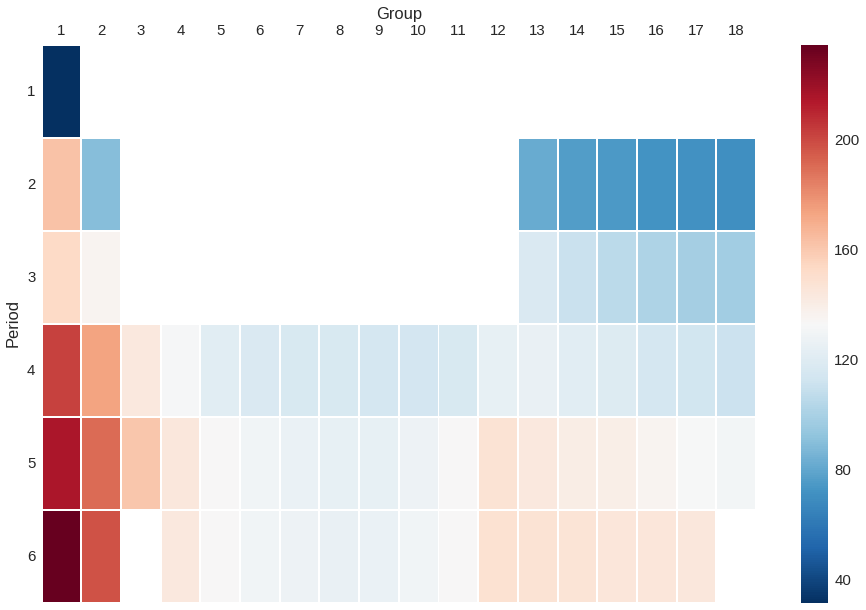

In [81]:
heatmap('')